In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00005.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00057.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00020.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00072.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00040.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00043.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00010.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00071.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/image

In [3]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import scipy as sp
import soundfile as sf

# Loading Select Data

In [4]:
# There are 10 different Genres in the GTZAN Music Genre Dataset
# Let us load the first example wav file of each
blues_file = "../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav"
classical_file = "../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00000.wav"
country_file = "../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00000.wav"
disco_file = "../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00000.wav"
hiphop_file = "../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00000.wav"
jazz_file = "../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00000.wav"
metal_file = "../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00000.wav"
pop_file = "../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav"
reggae_file = "../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00000.wav"
rock_file = "../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00000.wav"

In [ ]:
# we can play any file as :
ipd.Audio(classical_file)

These files also have vocals in them, before we try the FT on these audios, lets seperate the vocals out of the audio files. We can do this using librosa

In [ ]:
# loading the files:
# the sample rate sr remains the same, so lets only take it once
blues, sr = librosa.load(blues_file)
classical, _ = librosa.load(classical_file)
country, _ = librosa.load(country_file)
disco, _ = librosa.load(disco_file)
hiphop, _ = librosa.load(hiphop_file)
jazz, _ = librosa.load(jazz_file)
metal, _ = librosa.load(metal_file)
pop, _ = librosa.load(pop_file)
reggae, _ = librosa.load(reggae_file)
rock, _ = librosa.load(rock_file)

# Seperating Audio Files from Vocals
For all except clasccial since it already has no vocals

In [5]:
pip install spleeter

Note: you may need to restart the kernel to use updated packages.


In [7]:
!spleeter separate -o output/ ../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav

INFO:spleeter:File output/blues.00000/vocals.wav written succesfully
INFO:spleeter:File output/blues.00000/accompaniment.wav written succesfully
Exception ignored in: <function Separator.__del__ at 0x7faa851050e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/spleeter/separator.py", line 135, in __del__
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 755, in close
AttributeError: 'NoneType' object has no attribute 'TF_CloseSession'


In [8]:
!spleeter separate -o output/ ../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00000.wav

INFO:spleeter:File output/country.00000/vocals.wav written succesfully
INFO:spleeter:File output/country.00000/accompaniment.wav written succesfully
Exception ignored in: <function Separator.__del__ at 0x7f20a646d050>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/spleeter/separator.py", line 135, in __del__
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 755, in close
AttributeError: 'NoneType' object has no attribute 'TF_CloseSession'


In [9]:
!spleeter separate -o output/ ../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00000.wav

INFO:spleeter:File output/disco.00000/vocals.wav written succesfully
INFO:spleeter:File output/disco.00000/accompaniment.wav written succesfully
Exception ignored in: <function Separator.__del__ at 0x7f8ad02a50e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/spleeter/separator.py", line 135, in __del__
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 755, in close
AttributeError: 'NoneType' object has no attribute 'TF_CloseSession'


In [10]:
!spleeter separate -o output/ ../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00000.wav

INFO:spleeter:File output/hiphop.00000/vocals.wav written succesfully
INFO:spleeter:File output/hiphop.00000/accompaniment.wav written succesfully
Exception ignored in: <function Separator.__del__ at 0x7f42c083f0e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/spleeter/separator.py", line 135, in __del__
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 755, in close
AttributeError: 'NoneType' object has no attribute 'TF_CloseSession'


In [11]:
!spleeter separate -o output/ ../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00000.wav

INFO:spleeter:File output/jazz.00000/vocals.wav written succesfully
INFO:spleeter:File output/jazz.00000/accompaniment.wav written succesfully
Exception ignored in: <function Separator.__del__ at 0x7feffaa3e170>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/spleeter/separator.py", line 135, in __del__
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 755, in close
AttributeError: 'NoneType' object has no attribute 'TF_CloseSession'


In [12]:
!spleeter separate -o output/ ../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00000.wav

INFO:spleeter:File output/metal.00000/vocals.wav written succesfully
INFO:spleeter:File output/metal.00000/accompaniment.wav written succesfully
Exception ignored in: <function Separator.__del__ at 0x7f2e66fe20e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/spleeter/separator.py", line 135, in __del__
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 755, in close
AttributeError: 'NoneType' object has no attribute 'TF_CloseSession'


In [13]:
!spleeter separate -o output/ ../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav

INFO:spleeter:File output/pop.00000/vocals.wav written succesfully
INFO:spleeter:File output/pop.00000/accompaniment.wav written succesfully
Exception ignored in: <function Separator.__del__ at 0x7f51c8dd1170>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/spleeter/separator.py", line 135, in __del__
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 755, in close
AttributeError: 'NoneType' object has no attribute 'TF_CloseSession'


In [14]:
!spleeter separate -o output/ ../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00000.wav

INFO:spleeter:File output/reggae.00000/vocals.wav written succesfully
INFO:spleeter:File output/reggae.00000/accompaniment.wav written succesfully
Exception ignored in: <function Separator.__del__ at 0x7fb4dd76b0e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/spleeter/separator.py", line 135, in __del__
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 755, in close
AttributeError: 'NoneType' object has no attribute 'TF_CloseSession'


In [15]:
!spleeter separate -o output/ ../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00000.wav

INFO:spleeter:File output/rock.00000/vocals.wav written succesfully
INFO:spleeter:File output/rock.00000/accompaniment.wav written succesfully
Exception ignored in: <function Separator.__del__ at 0x7f6f0d4b3170>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/spleeter/separator.py", line 135, in __del__
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 755, in close
AttributeError: 'NoneType' object has no attribute 'TF_CloseSession'


# Loading genre sounds

In [16]:
# the s stands for sounds only
bluess, sr = librosa.load("./output/blues.00000/accompaniment.wav")
classicals, _ = librosa.load(classical_file)
countrys, _ = librosa.load("./output/country.00000/accompaniment.wav")
discos, _ = librosa.load("./output/disco.00000/accompaniment.wav")
hiphops, _ = librosa.load("./output/hiphop.00000/accompaniment.wav")
jazzs, _ = librosa.load("./output/jazz.00000/accompaniment.wav")
metals, _ = librosa.load("./output/metal.00000/accompaniment.wav")
pops, _ = librosa.load("./output/pop.00000/accompaniment.wav")
reggaes, _ = librosa.load("./output/reggae.00000/accompaniment.wav")
rocks, _ = librosa.load("./output/rock.00000/accompaniment.wav")

In [ ]:
# checking the files
ipd.Audio("./output/rock.00000/accompaniment.wav")

# Comparing Waveforms

In [ ]:
# function to compare waveforms before and after vocal seperation
def compare_waveforms(audio1, audio2, title):
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 1, 1)
    
    librosa.display.waveplot(audio1, alpha=0.5, color="y")
    plt.title(title + " with vocals")
    plt.ylim((-1,1))
    
    plt.subplot(1, 1, 1)
    
    librosa.display.waveplot(audio2, alpha=0.5, color="b")
    plt.title(title + " without vocals")
    plt.ylim((-1,1))

In [ ]:
compare_waveforms(blues, bluess, "blues")
# there is a distinct pattern that isnt padded with the vocals anymore

In [ ]:
compare_waveforms(classical, classicals, "classical")
# it is the same as it has no vocals

In [ ]:
compare_waveforms(country, countrys, "country")
# vocals padded the shape of the waveform

In [ ]:
compare_waveforms(disco, discos, "disco")
# looks very much the same

In [ ]:
compare_waveforms(hiphop, hiphops, "hiphop")
# looks similar

In [ ]:
compare_waveforms(jazz, jazzs, "jazz")
# very similar

In [ ]:
compare_waveforms(metal, metals, "metal")
# still similar

In [ ]:
compare_waveforms(pop, pops, "pop")
# vocals play a huge part in the track, and their removal makes a noticable difference

In [ ]:
compare_waveforms(reggae, reggaes, "reggae")
# also has a lot of differences

In [ ]:
compare_waveforms(rock, rocks, "rock")
# vocals are distinct from instruments

In [ ]:
# a function to seperate vocals:
def seperate_vocals(y):
    # getting the magnitude and phase
    S_full, phase = librosa.magphase(librosa.stft(y))
    S_filter = librosa.decompose.nn_filter(S_full,
                                           aggregate=np.median,
                                           metric='cosine',
                                           width=int(librosa.time_to_frames(2, sr=sr)))
    
    S_filter = np.minimum(S_full, S_filter)
    
    margin_i, margin_v = 2, 10
    power = 2

    mask_i = librosa.util.softmask(S_filter,
                                   margin_i * (S_full - S_filter),
                                   power=power)

    mask_v = librosa.util.softmask(S_full - S_filter,
                                   margin_v * S_filter,
                                   power=power)

    # Once we have the masks, simply multiply them with the input spectrum
    # to separate the components
    S_foreground = mask_v * S_full
    S_background = mask_i * S_full
#     D_background = S_background * phase
    y_background = librosa.istft(S_background)
    
    return y_background

# Spectrogram for Genres

In [17]:
FRAME_SIZE = 2048
HOP_LENGTH = 512

In [ ]:
def spectrogram(Y, sr, frame_size, hop_length, y_axis="linear", title=""):
    # getting the short term fourier transformation
    S_signal = librosa.stft(Y, n_fft=frame_size, hop_length=hop_length)
    # turning the sound to decibels, i.e. in logarithmic amplitude, that is how we percieve sound
    Y_signal = librosa.power_to_db(np.abs(S_signal) ** 2)
    
    # plot spectrogram
    plt.figure(figsize=(25, 10))
    plt.title(title)
    librosa.display.specshow(Y_signal, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

In [ ]:
spectrogram(bluess, sr, FRAME_SIZE, HOP_LENGTH, y_axis="log", title="blues")
spectrogram(classicals, sr, FRAME_SIZE, HOP_LENGTH, y_axis="log", title="classical")
spectrogram(countrys, sr, FRAME_SIZE, HOP_LENGTH, y_axis="log", title="country")
spectrogram(discos, sr, FRAME_SIZE, HOP_LENGTH, y_axis="log", title="disco")
spectrogram(hiphops, sr, FRAME_SIZE, HOP_LENGTH, y_axis="log", title="hiphop")
spectrogram(jazzs, sr, FRAME_SIZE, HOP_LENGTH, y_axis="log", title="jazz")
spectrogram(metals, sr, FRAME_SIZE, HOP_LENGTH, y_axis="log", title="metal")
spectrogram(pops, sr, FRAME_SIZE, HOP_LENGTH, y_axis="log", title="pop")
spectrogram(reggaes, sr, FRAME_SIZE, HOP_LENGTH, y_axis="log", title="reggae")
spectrogram(rocks, sr, FRAME_SIZE, HOP_LENGTH, y_axis="log", title="rock")

In [ ]:
import scipy as sp

def plot_ft(audio):
    ft = sp.fft.fft(audio)
    
    # getting the actual magnitude
    magnitude = np.absolute(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    
    # plot spectrum
    plt.figure(figsize=(18, 8))
    plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

# Mel Spectrograms

In [ ]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
filter_banks.shape

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

# shows the bands and the weight

In [ ]:
def mel_spectrogram(audio, frame_size, hop_size, bands, title=""):
    mel_spectrogram = librosa.feature.melspectrogram(audio, sr=sr, n_fft=frame_size, hop_length=hop_size, n_mels=bands)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(log_mel_spectrogram, 
                             x_axis="time",
                             y_axis="mel", 
                             sr=sr)
    plt.title(title)
    plt.colorbar(format="%+2.f")
    plt.show()


In [ ]:
mel_spectrogram(bluess, FRAME_SIZE, HOP_LENGTH, 10, "blues")
mel_spectrogram(classicals, FRAME_SIZE, HOP_LENGTH, 10, "classical")
mel_spectrogram(countrys, FRAME_SIZE, HOP_LENGTH, 10, "country")
mel_spectrogram(discos, FRAME_SIZE, HOP_LENGTH, 10, "disco")
mel_spectrogram(hiphops, FRAME_SIZE, HOP_LENGTH, 10, "hiphops")
mel_spectrogram(jazzs, FRAME_SIZE, HOP_LENGTH, 10, "jazz")
mel_spectrogram(metals, FRAME_SIZE, HOP_LENGTH, 10, "metal")
mel_spectrogram(pops, FRAME_SIZE, HOP_LENGTH, 10, "pop")
mel_spectrogram(reggaes, FRAME_SIZE, HOP_LENGTH, 10, "reggae")
mel_spectrogram(rocks, FRAME_SIZE, HOP_LENGTH, 10, "rock")

# MFCCs for Genres

In [ ]:
# function to get mfccs
def mfcc_spectrogram(audio, numMfccs, title=""):
    mfccs = librosa.feature.mfcc(audio, n_mfcc=numMfccs, sr=sr)
    plt.figure(figsize=(25,10))
    librosa.display.specshow(mfccs,
                            x_axis="time",
                            sr=sr)
    plt.colorbar(format="%+2f")
    plt.title(title)
    plt.show()

In [ ]:
mfcc_spectrogram(bluess, 13, "blues")
mfcc_spectrogram(classicals, 13, "classical")
mfcc_spectrogram(countrys, 13, "country")
mfcc_spectrogram(discos, 13, "disco")
mfcc_spectrogram(hiphops, 13, "hiphops")
mfcc_spectrogram(jazzs, 13, "jazz")
mfcc_spectrogram(metals, 13, "metal")
mfcc_spectrogram(pops, 13, "pop")
mfcc_spectrogram(reggaes, 13, "reggae")
mfcc_spectrogram(rocks, 13, "rock")

# Band Energy Ratio for different genres

In [ ]:
def calculate_split_frequency_bin(spec, split_freq, sr):
    freq_range = sr / 2
    freq_delta_per_bin = freq_range / spec.shape[0]
    
    split_freq_bin = np.floor(split_freq / freq_delta_per_bin)
    return int(split_freq_bin)

In [ ]:
# visualise BER
def ber(audio, split_freq, sr, title=""):
    spec = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
    
    split_freq_bin = calculate_split_frequency_bin(spec, split_freq, sr)
    
    # move to power spec
    power_spec = np.abs(spec) ** 2
    # to iterate thru time, get the transpose to make it at pos 0
    power_spec = power_spec.T
    
    ber = []
    
    # calculate BER for each frame
    for frame in power_spec:
        sum_power_lower_freq = np.sum(frame[:split_freq_bin])
        sum_power_higher_freq = np.sum(frame[split_freq_bin:])
        
        ber_current = sum_power_lower_freq / sum_power_higher_freq
        
        ber.append(ber_current)
        
    ber = np.array(ber)
    
    # time is same for all
    frames = range(len(ber))
    t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
    
    plt.figure(figsize=(25,10))
    plt.plot(t, ber)
    plt.title(title)
    plt.show()

In [ ]:
ber(bluess, 2000, sr, "blues")
ber(classicals, 2000, sr, "classical")
ber(countrys, 2000, sr, "country")
ber(discos, 2000, sr, "disco")
ber(hiphops, 2000, sr, "hiphops")
ber(jazzs, 2000, sr, "jazz")
ber(metals, 2000, sr, "metal")
ber(pops, 2000, sr, "pop")
ber(reggaes, 2000, sr, "reggae")
ber(rocks, 2000, sr, "rock")

# Spectral Centroids and Bandwidth for Genres

In [22]:
def sc_spectrogram(audio, title=""):
    sc_audio = librosa.feature.spectral_centroid(y=audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
    
    # time is same for all
    frames = range(len(sc_audio))
    t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
    
    plt.figure(figsize=(25,10))
    plt.plot(t, sc_audio)
    plt.title(title)
    plt.show()

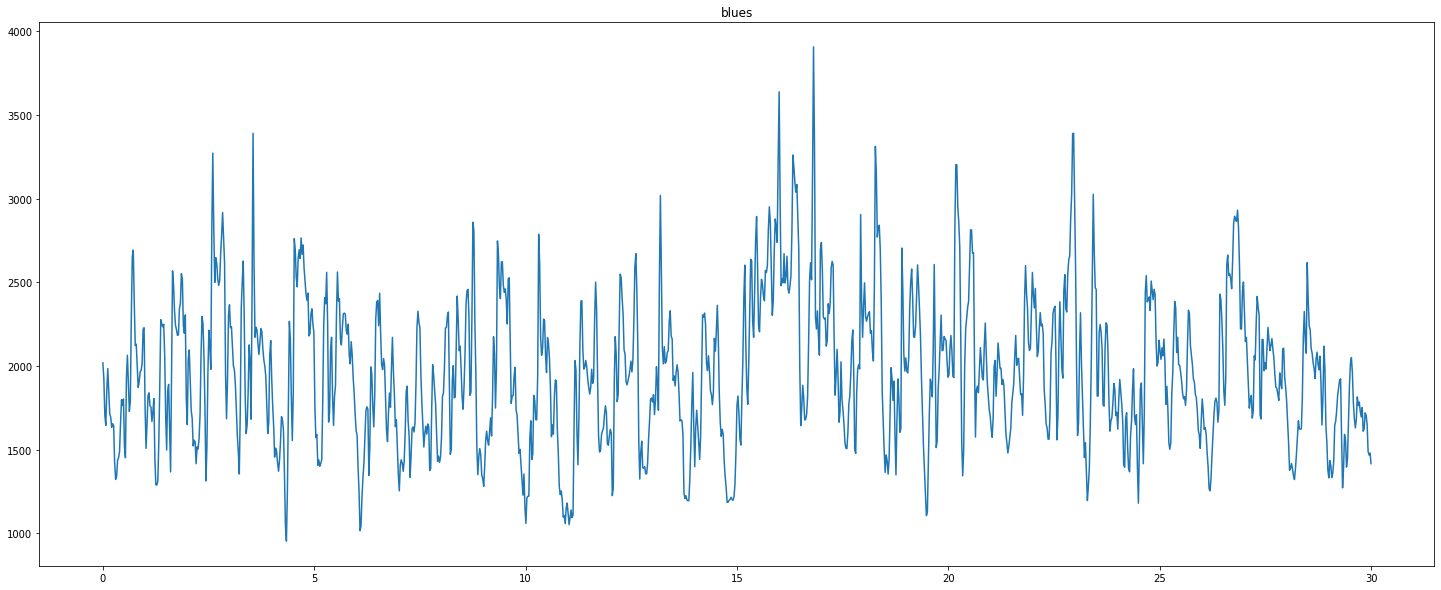

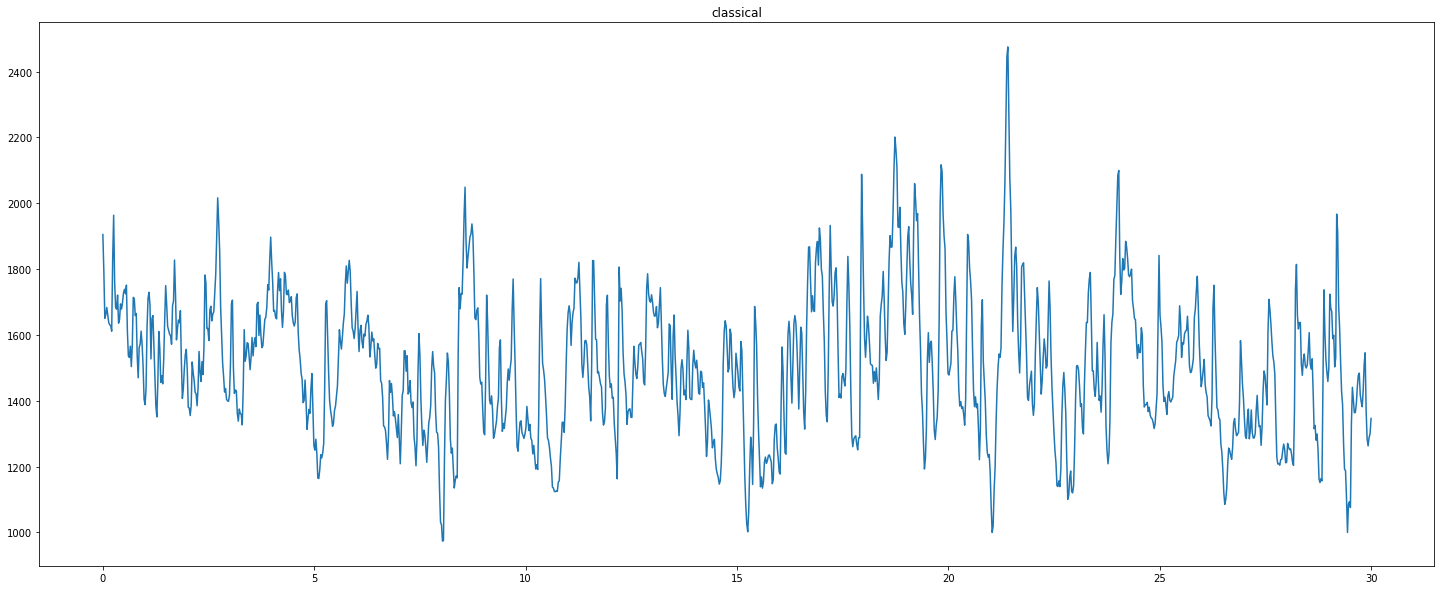

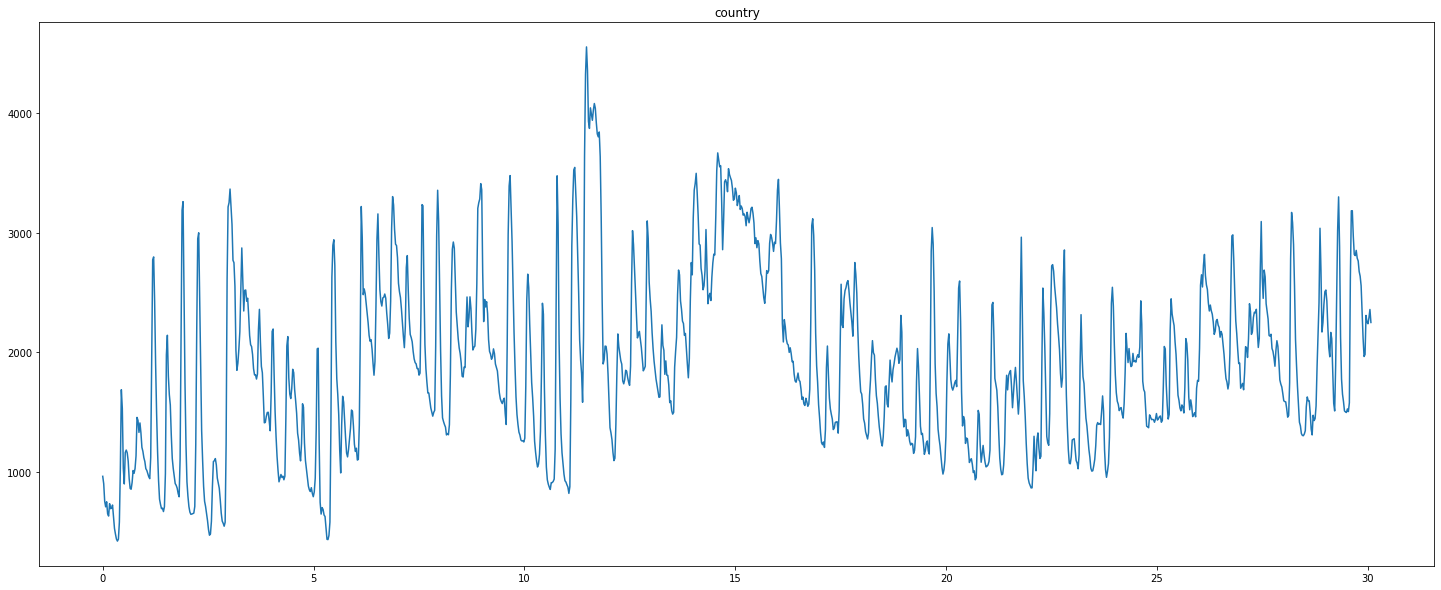

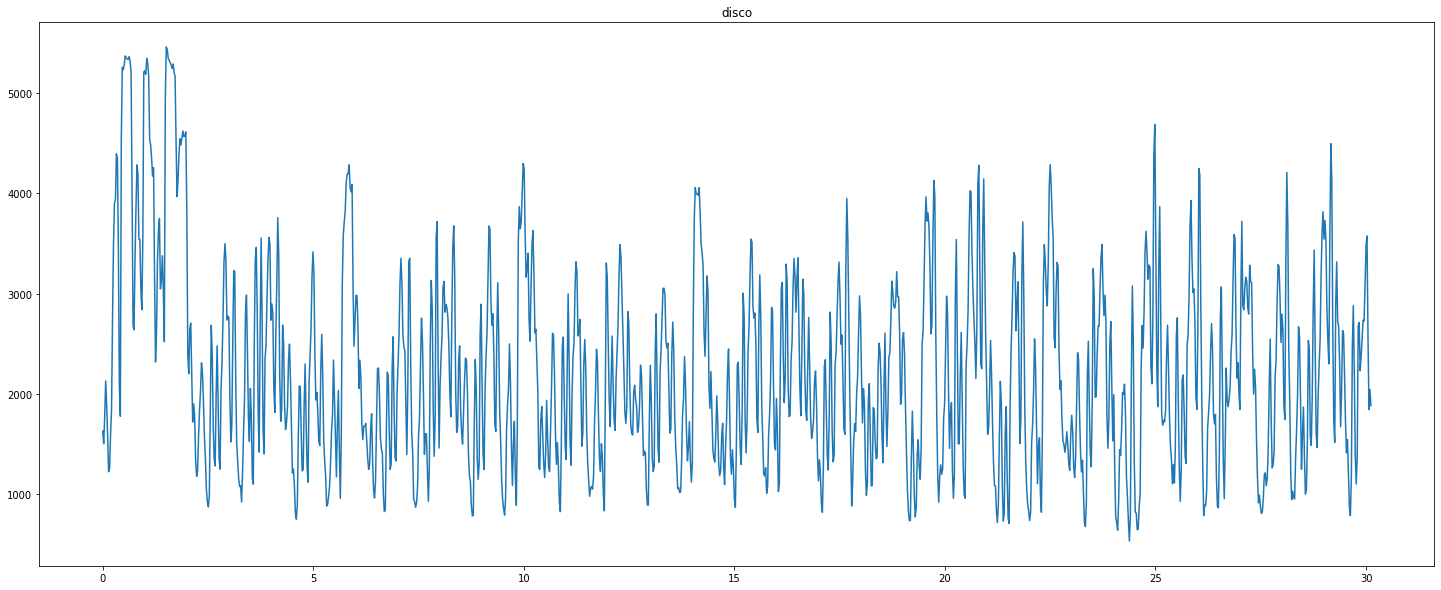

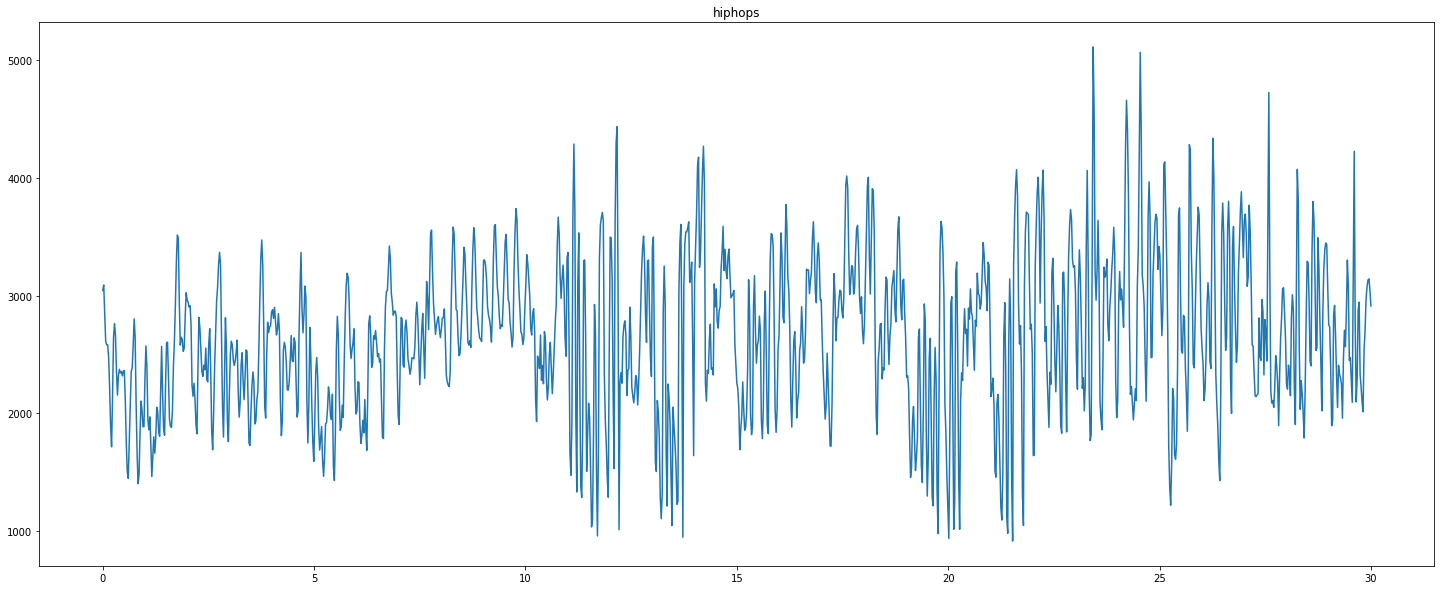

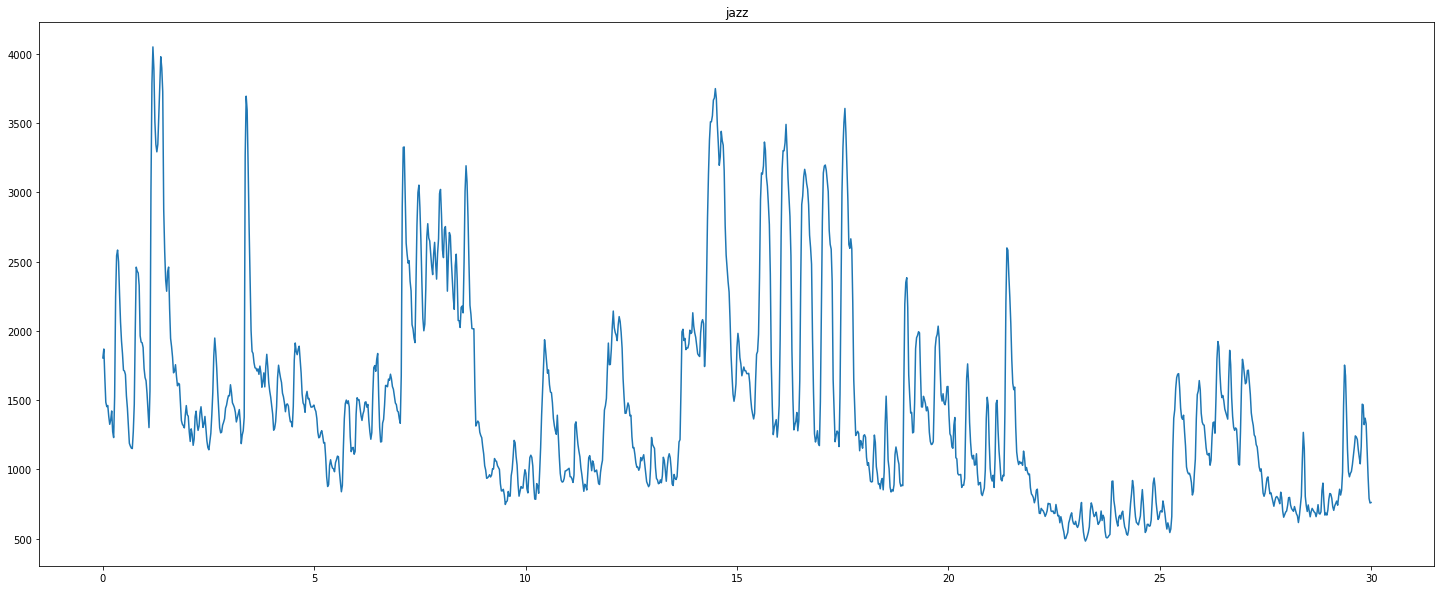

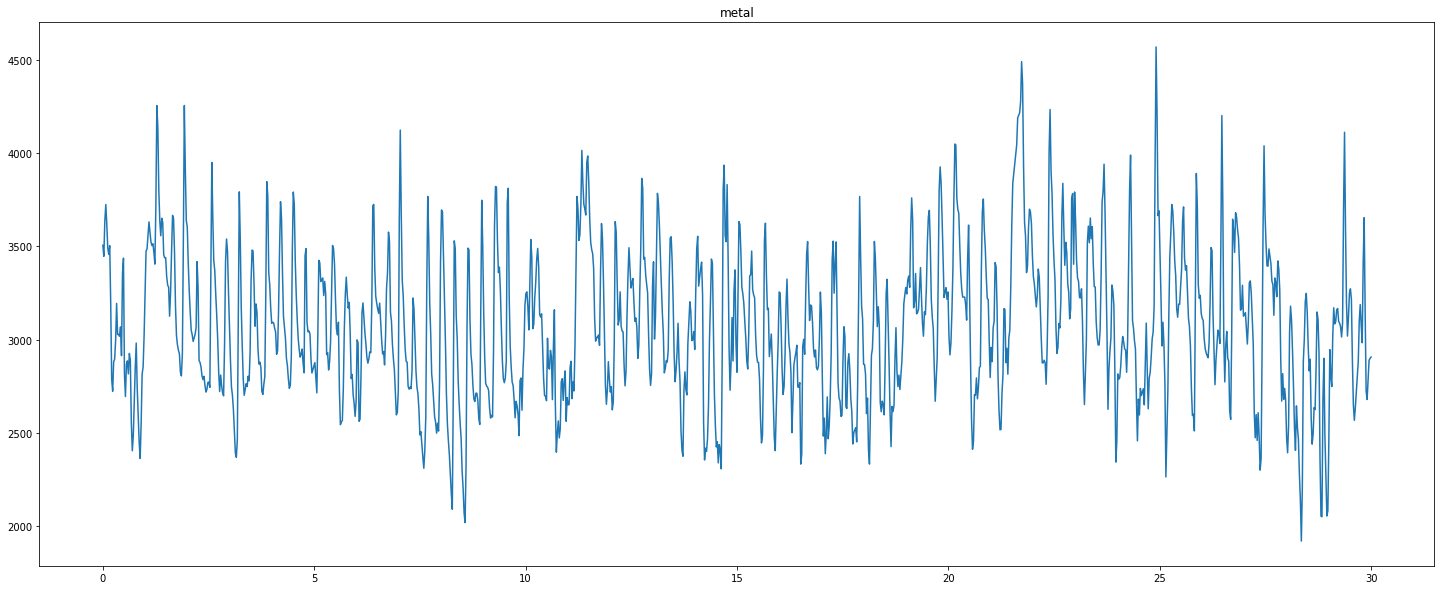

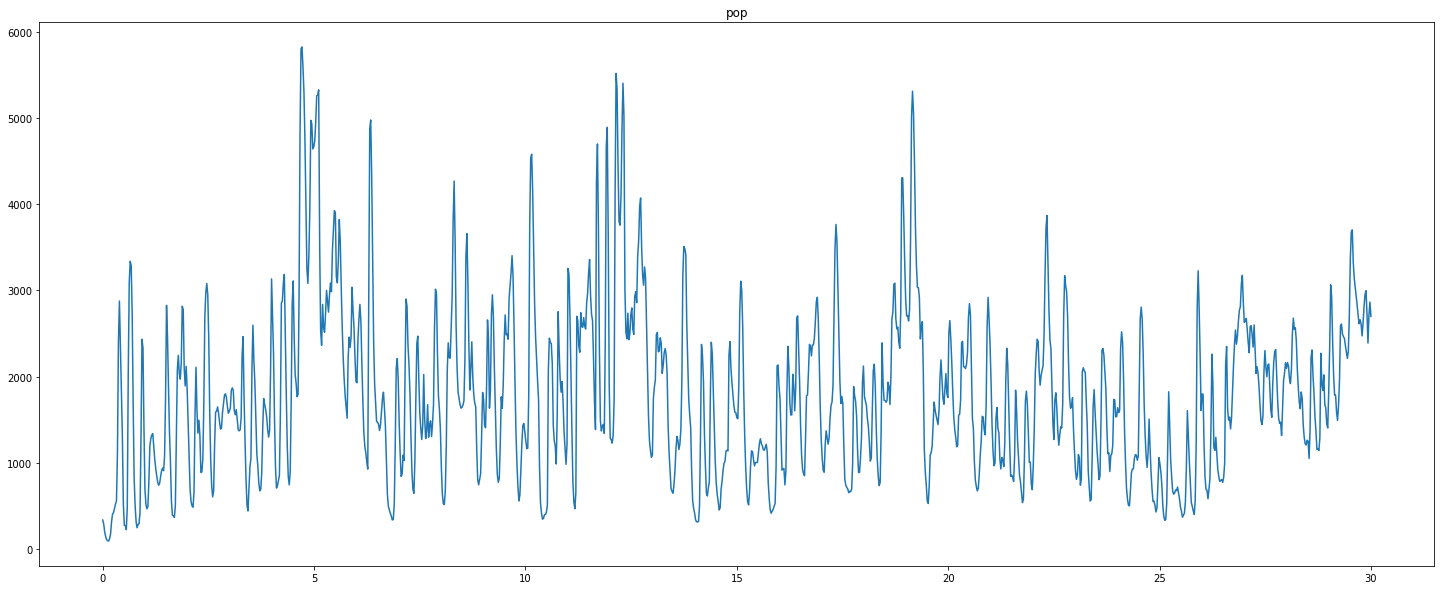

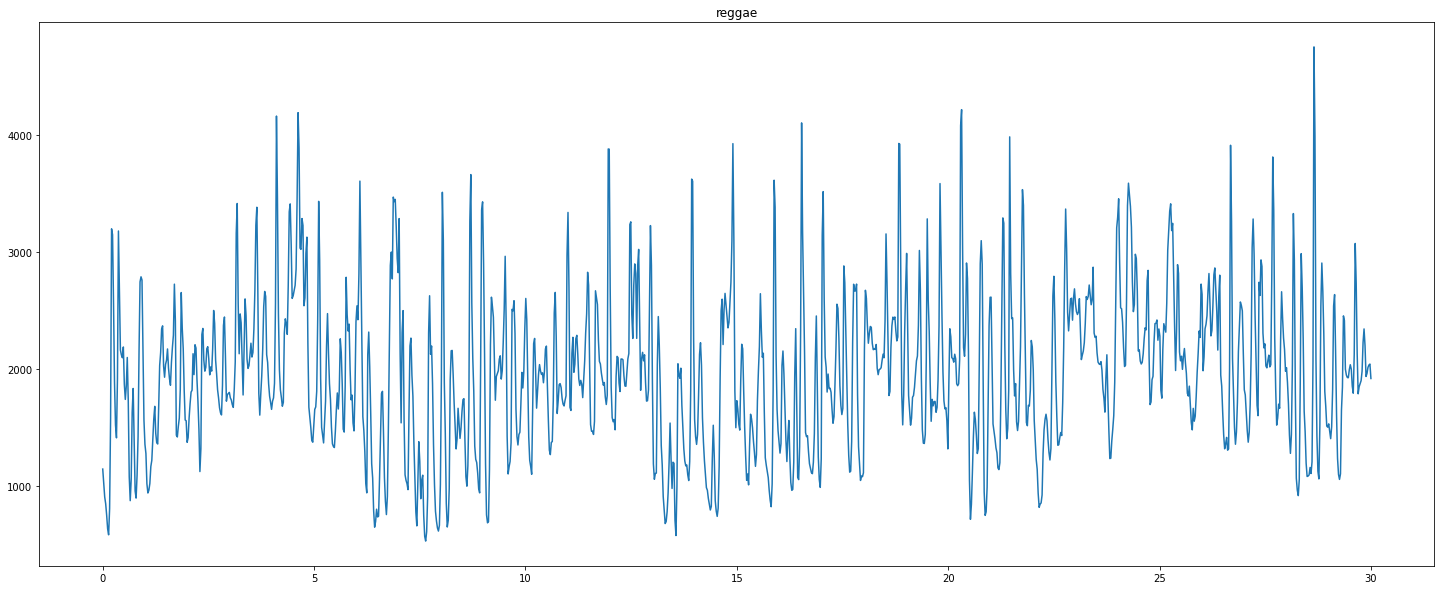

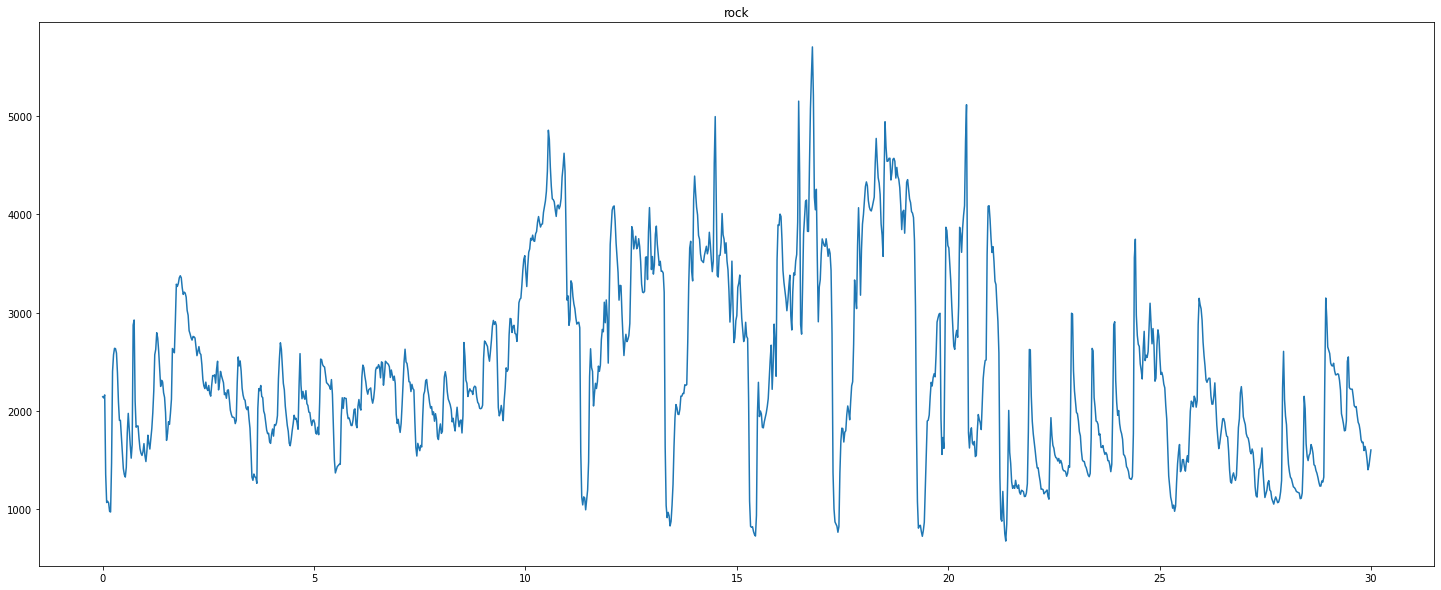

In [23]:
sc_spectrogram(bluess, "blues")
sc_spectrogram(classicals, "classical")
sc_spectrogram(countrys, "country")
sc_spectrogram(discos, "disco")
sc_spectrogram(hiphops, "hiphops")
sc_spectrogram(jazzs, "jazz")
sc_spectrogram(metals, "metal")
sc_spectrogram(pops, "pop")
sc_spectrogram(reggaes, "reggae")
sc_spectrogram(rocks, "rock")

In [24]:
def band_spectrogram(audio, title=""):
    band_audio = librosa.feature.spectral_bandwidth(y=audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
    
    # time is same for all
    frames = range(len(band_audio))
    t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
    
    plt.figure(figsize=(25,10))
    plt.plot(t, band_audio)
    plt.title(title)
    plt.show()

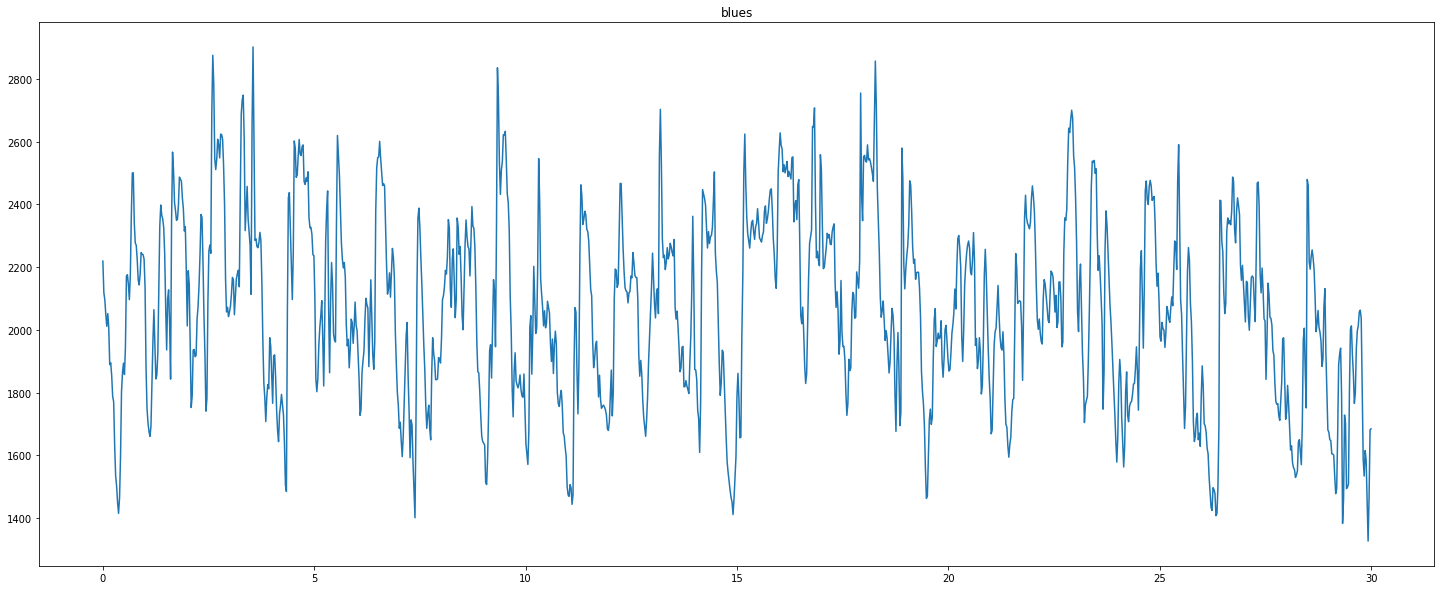

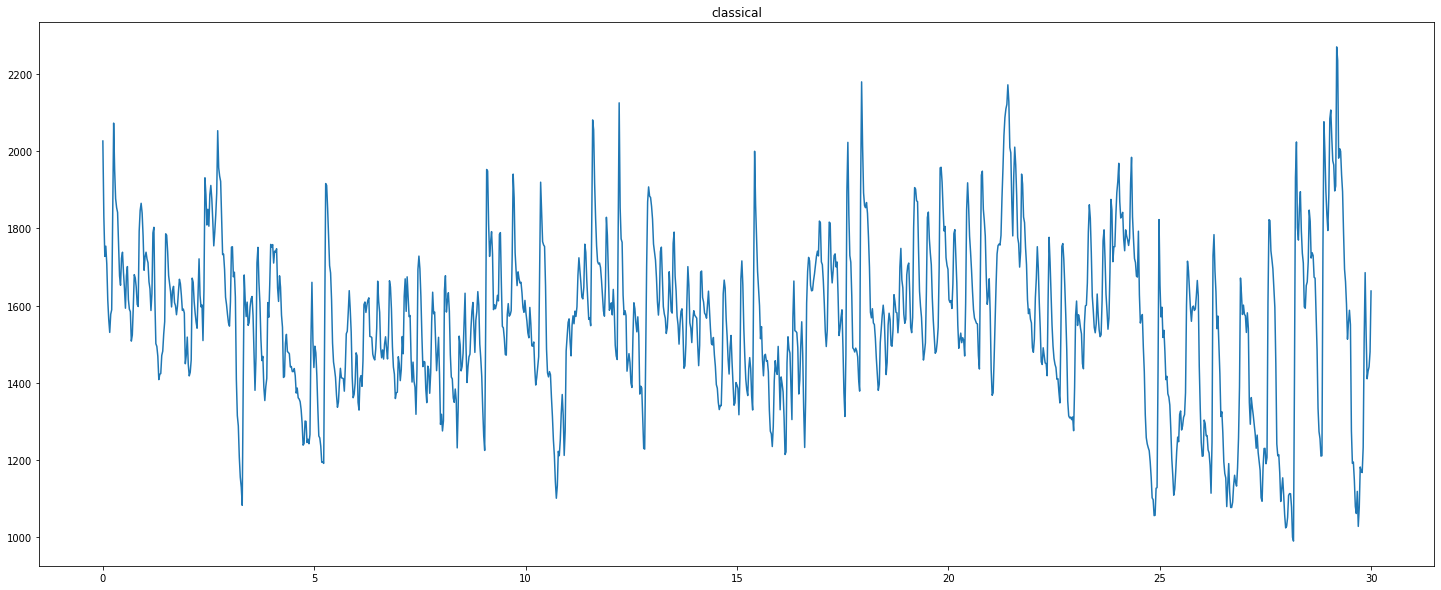

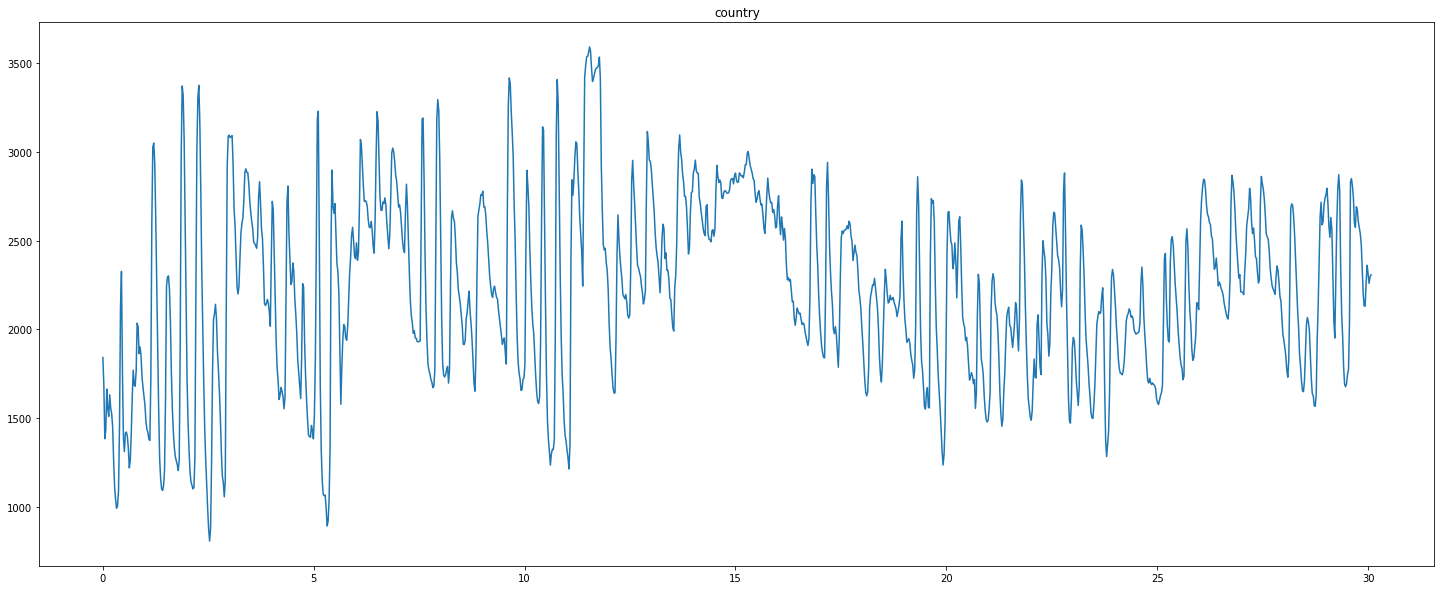

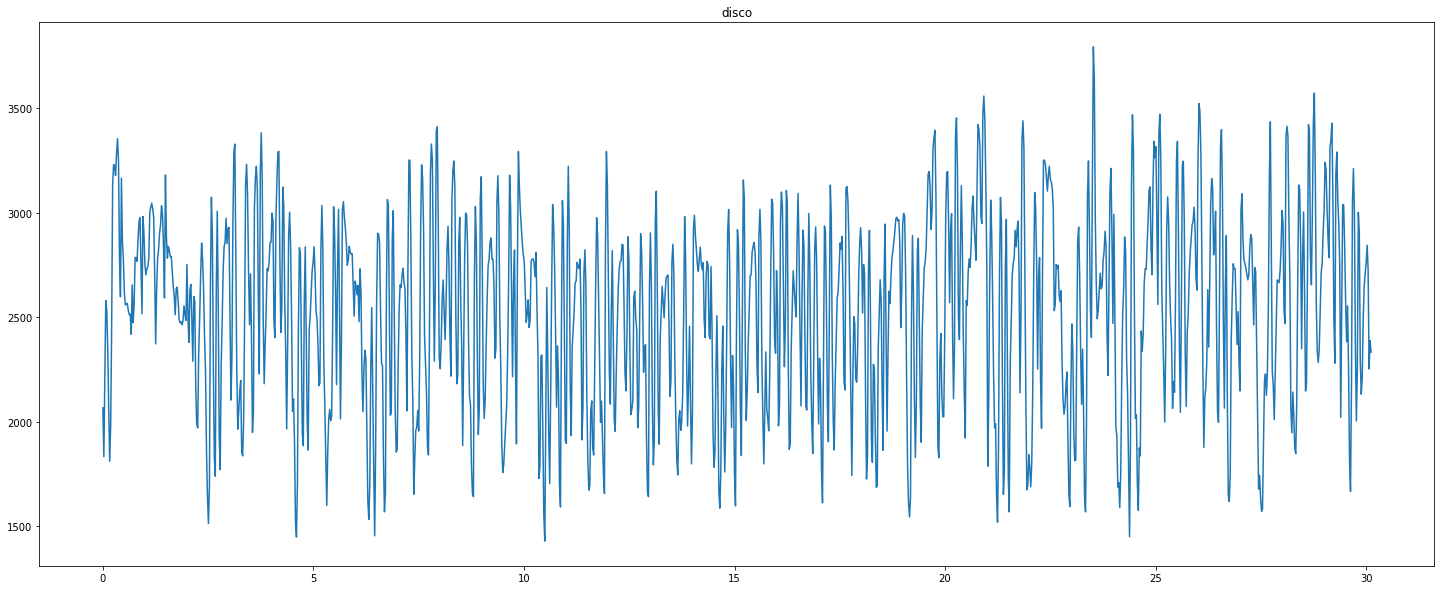

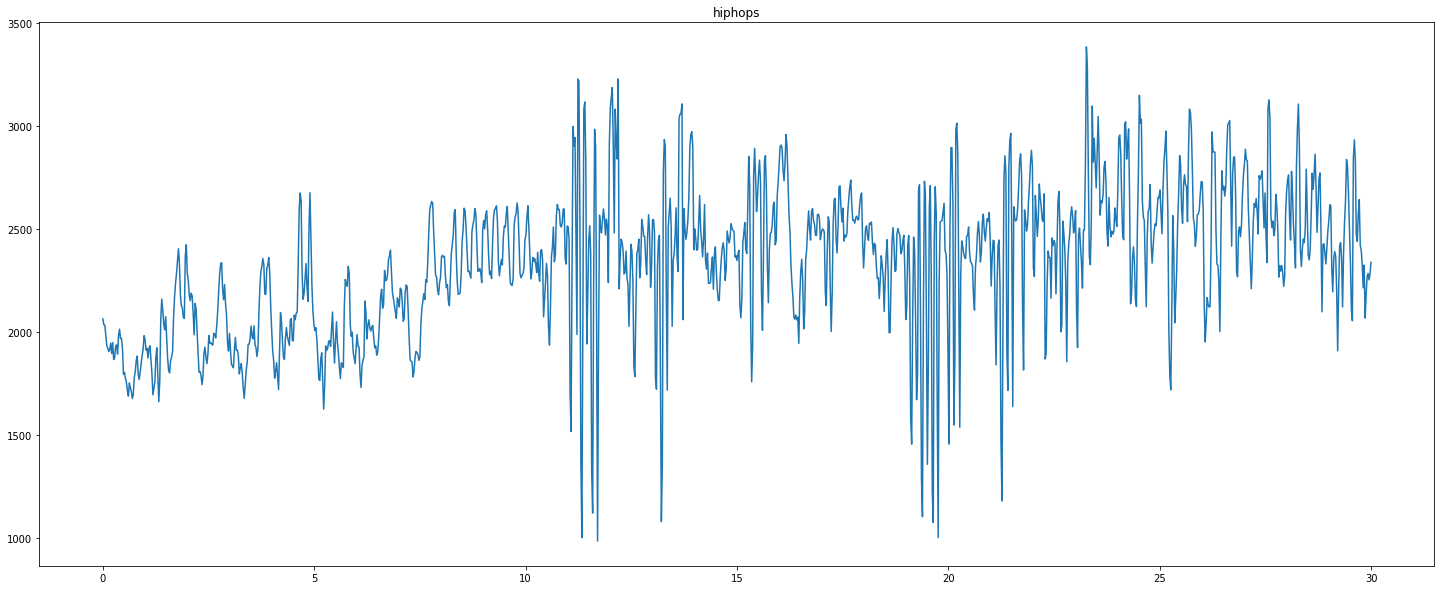

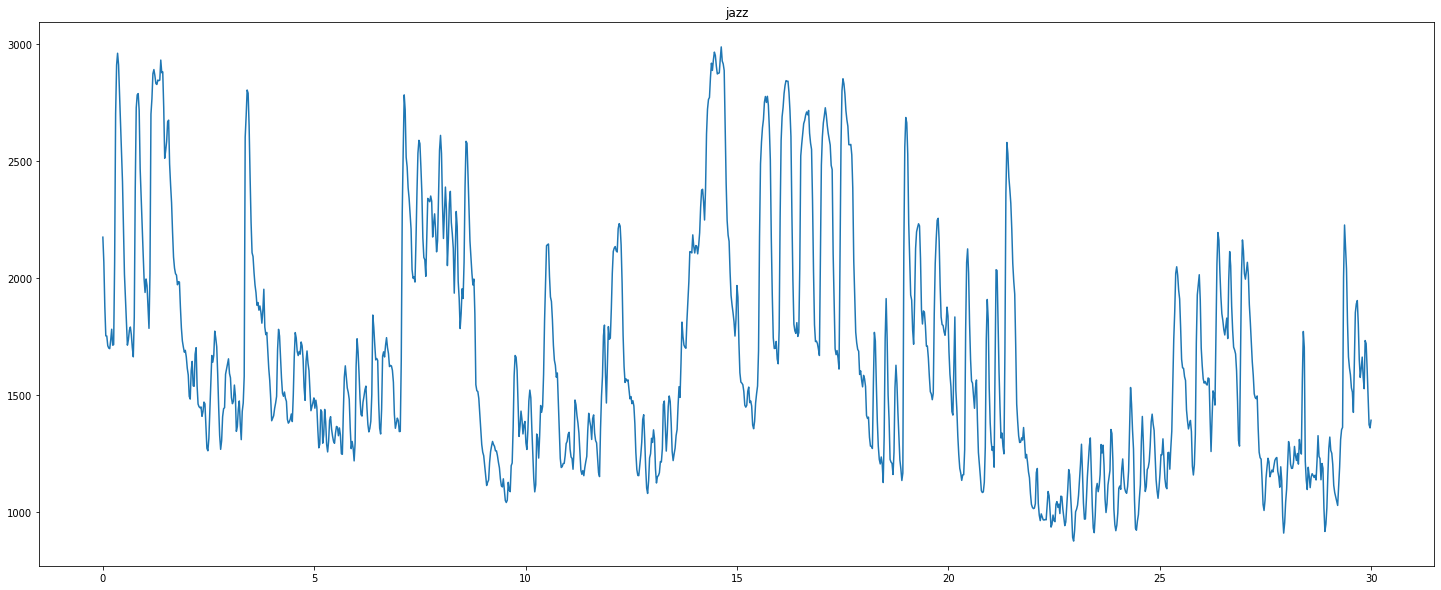

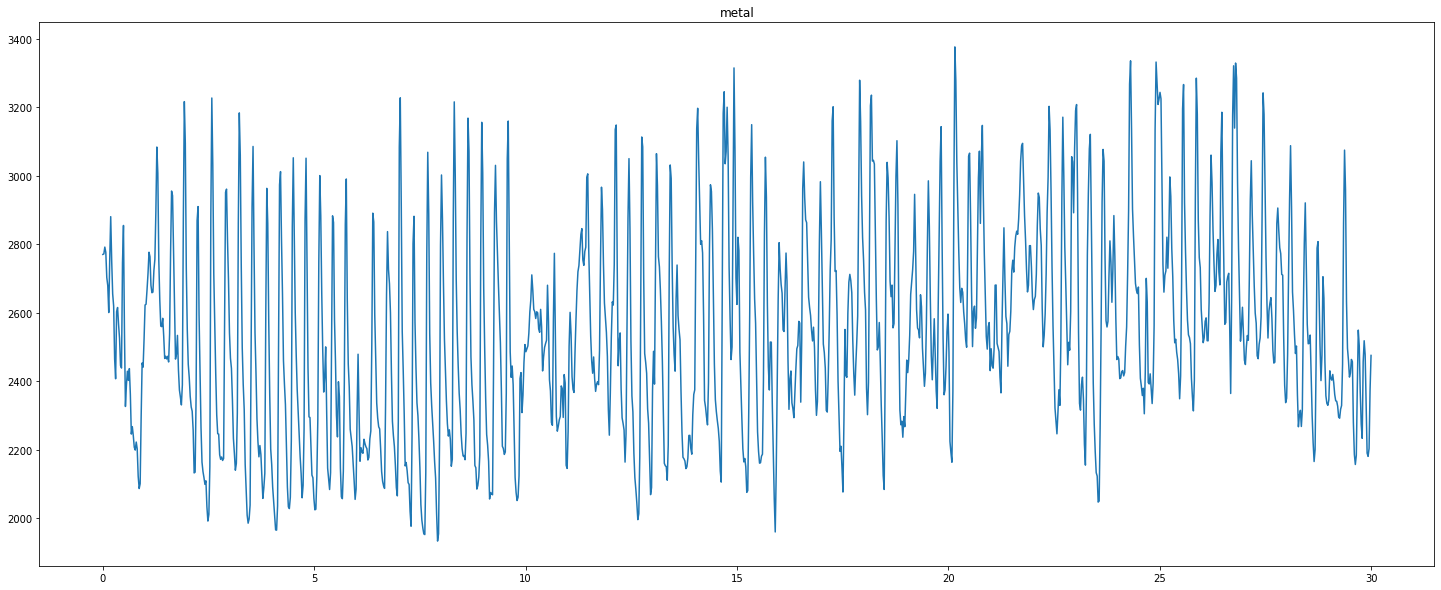

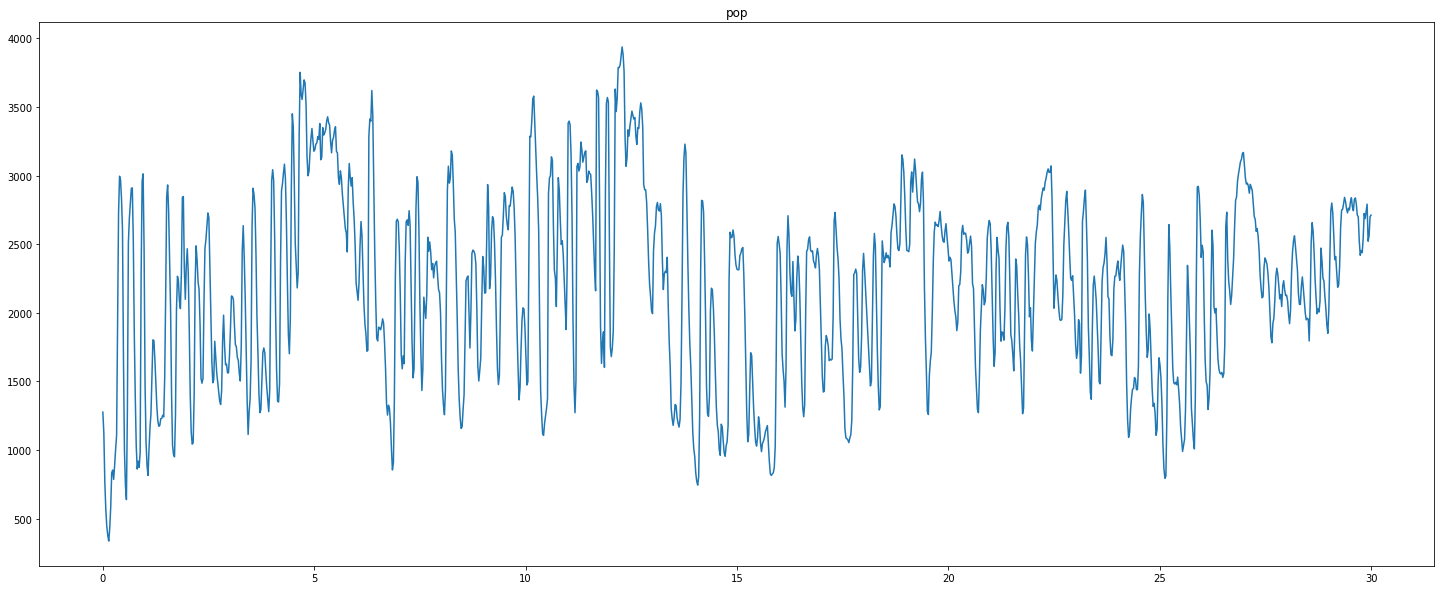

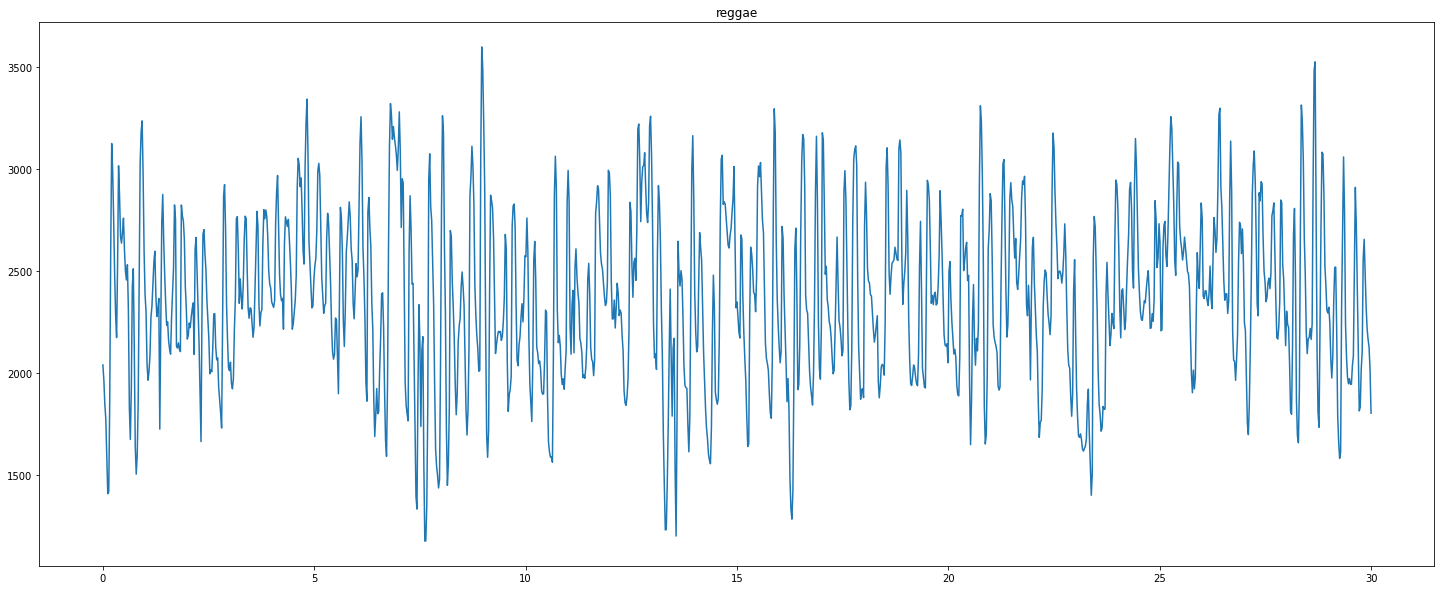

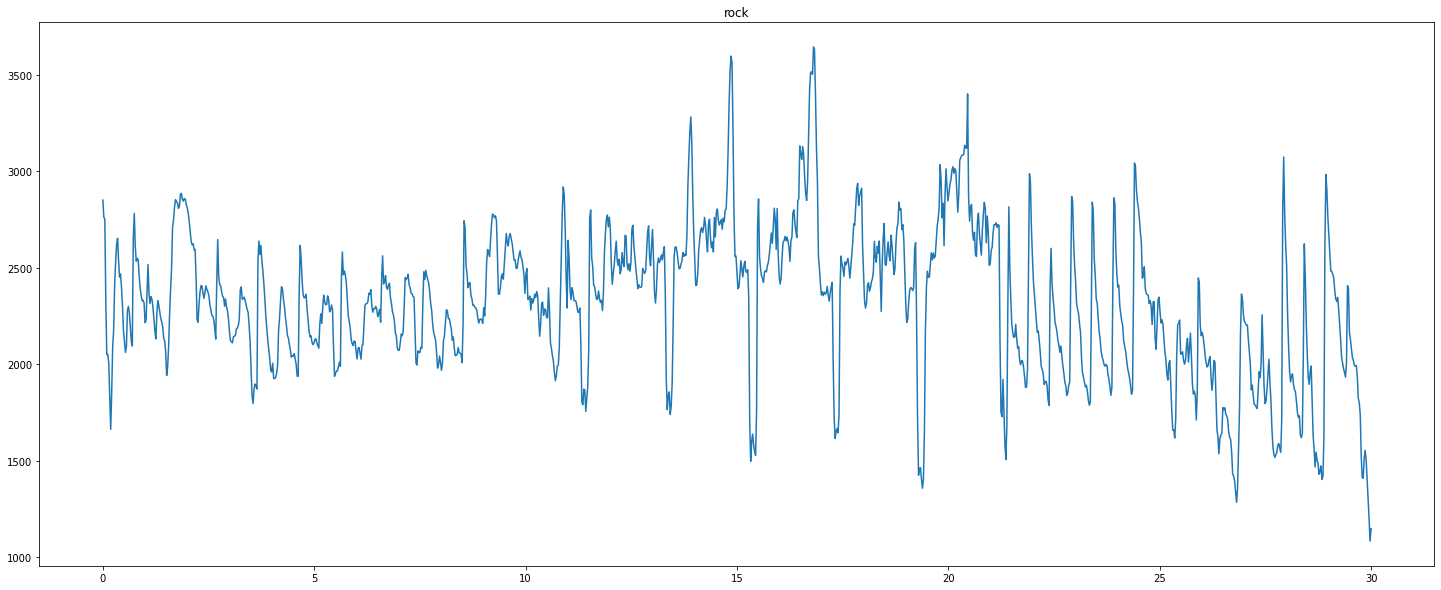

In [25]:
band_spectrogram(bluess, "blues")
band_spectrogram(classicals, "classical")
band_spectrogram(countrys, "country")
band_spectrogram(discos, "disco")
band_spectrogram(hiphops, "hiphops")
band_spectrogram(jazzs, "jazz")
band_spectrogram(metals, "metal")
band_spectrogram(pops, "pop")
band_spectrogram(reggaes, "reggae")
band_spectrogram(rocks, "rock")